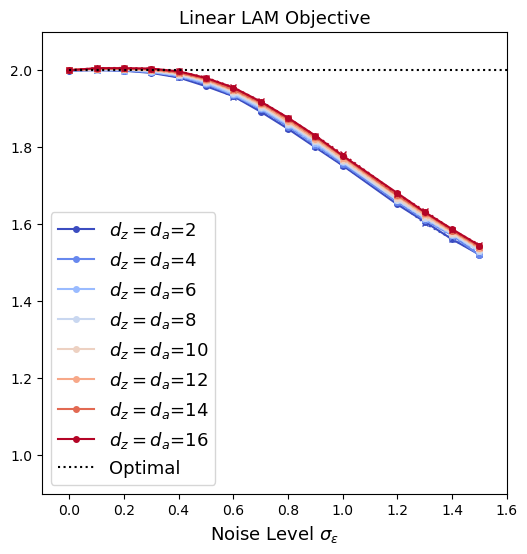

In [ ]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

record1 = pd.read_csv('scripts/4_2_False_no_noise.csv', index_col=0)
record1 = record1.loc[(record1['iter'] == 10000)]

record2 = pd.read_csv('scripts/4_2_False_no_noise_delta.csv', index_col=0)
record2 = record2.loc[(record2['iter'] == 10000)]

total_record = pd.concat([record1, record2])

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('da')) - 1) 

counter = 0
for da_value, group in total_record.groupby('da'):
    for delta in [0, -1, 1]:
        sorted_group = group.loc[group['dz'] == group['da'] + delta]
        sorted_group = sorted_group.sort_values('sigma')
        if delta == 0:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                label=f'$d_z=d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
        elif delta == 1:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                ls=':', marker='x', markersize=4, color=cmap(norm(counter)))
        elif delta == -1:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                ls='-.', marker='^', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

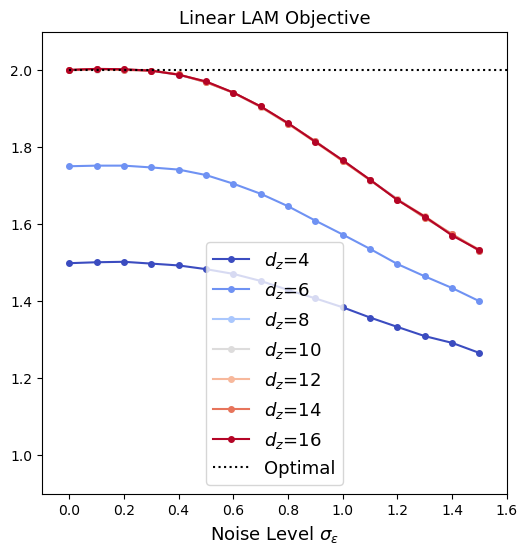

In [6]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_False_no_noise_new.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

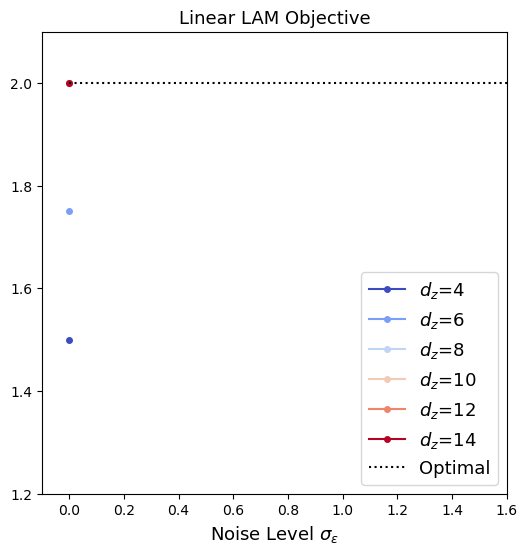

In [3]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

record1 = pd.read_csv('scripts/4_2_False_no_noise_new.csv', index_col=0)
record1 = record1.loc[(record1['iter'] == 10000)]

total_record = record1

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([1.2, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

In [4]:
sorted_group

,do,da,dz,sigma,iter,recon_loss,act_mse,obs_mse,noi_mse
65,128,8,14,0.0,10000,0.000021,0.000264,1.000626,1.0


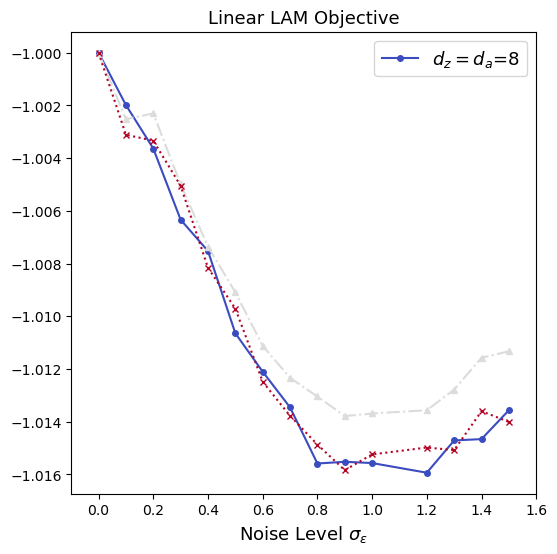

In [19]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

record1 = pd.read_csv('scripts/4_2_False_no_noise.csv', index_col=0)
record1 = record1.loc[(record1['iter'] == 10000)]

record2 = pd.read_csv('scripts/4_2_False_no_noise_delta.csv', index_col=0)
record2 = record2.loc[(record2['iter'] == 10000)]

total_record = pd.concat([record1, record2])

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=2) 

counter = 0
for da_value, group in total_record.groupby('da'):
    if da_value != 8:
        continue
    for delta in [0, -1, 1]:
        sorted_group = group.loc[group['dz'] == group['da'] + delta]
        sorted_group = sorted_group.sort_values('sigma')
        if delta == 0:
            plt.plot(sorted_group['sigma'], - sorted_group['noi_mse'], 
                label=f'$d_z=d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
        elif delta == 1:
            plt.plot(sorted_group['sigma'], - sorted_group['noi_mse'], 
                ls=':', marker='x', markersize=4, color=cmap(norm(counter)))
        elif delta == -1:
            plt.plot(sorted_group['sigma'], - sorted_group['noi_mse'], 
                ls='-.', marker='^', markersize=4, color=cmap(norm(counter)))
        counter += 1

# plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

# plt.ylim([1.2, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

In [8]:
sorted_group

,do,da,dz,sigma,iter,recon_loss,act_mse,obs_mse,noi_mse
87,128,16,16,0.0,10000,0.000021,0.000149,0.999934,1.000000
175,128,16,17,0.0,10000,0.000017,0.000117,1.000223,1.000000
164,128,16,15,0.0,10000,0.007835,0.062682,1.000768,1.000000
175,128,16,16,0.1,10000,0.000076,0.000445,1.000652,1.005163
351,128,16,17,0.1,10000,0.000071,0.000389,1.000090,1.005807
340,128,16,15,0.1,10000,0.007836,0.062643,1.000183,1.005404
263,128,16,16,0.2,10000,0.000106,0.001832,1.000298,1.006841
527,128,16,17,0.2,10000,0.000117,0.001907,1.000352,1.007524
516,128,16,15,0.2,10000,0.007838,0.063655,0.999487,1.006247
692,128,16,15,0.3,10000,0.007954,0.069481,1.000272,1.010334
